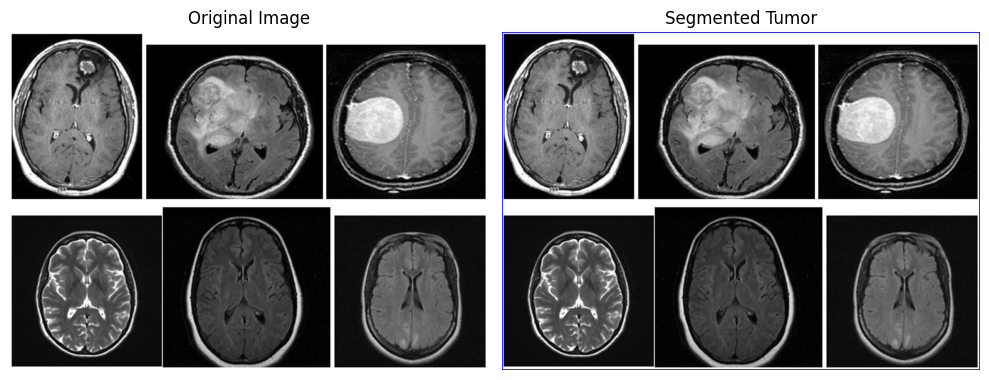

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/brain Tumor ..jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not found or unable to load.")
    exit()

# Preprocess
blurred = cv2.GaussianBlur(image, (5, 5), 0)
_, thresh = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY)
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for contour in contours:
    if cv2.contourArea(contour) > 1000:
        cv2.drawContours(output, [contour], -1, (0, 0, 255), 2)

# Display using matplotlib
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title("Segmented Tumor")
plt.axis('off')
plt.tight_layout()
plt.show()

